In [1]:
import bootstrap
import matplotlib.pyplot as plt
import time
import datetime
import numpy as np

In [8]:
def iterate_n_max(n_range):
    if type(n_range)==int:
        n_range=[n_range]
    start_time=time.time()
    start_cpu=time.clock()
    sig_set=np.arange(0.5,0.85,0.05)
    eps_set=np.arange(1.0,2.2,0.2)
    bootstrap.cutoff=1e-10
    dim=3
    k_max=7
    l_max=7
#    n_max=4
    m_max=2
    for n in n_range:
        tab1=bootstrap.ConformalBlockTable(dim,k_max,l_max,m_max,n)
        tab2=bootstrap.ConvolvedBlockTable(tab1)
        plot_grid(n,dim,tab2,sig_set,eps_set)
    end_time=time.time()
    end_cpu=time.clock()
    run_time=time.strftime("%H:%M:%S",time.gmtime(end_time-start_time))
    cpu_time=time.strftime("%H:%M:%S",time.gmtime(end_cpu-start_cpu))
    print("Run time "+run_time, "CPU time "+cpu_time)

In [9]:
def plot_grid(n,dim,table,sig_range,eps_range):
    start_time=time.time()
    start_cpu=time.clock()
    allowed_sig=[]
    allowed_eps=[]
    disallowed_sig=[]
    disallowed_eps=[]
    for sig in sig_range:
        for eps in eps_range:
            sdp=bootstrap.SDP(sig,table)
            sdp.set_bound(0,float(dim))
            sdp.add_point(0,eps)
            result=sdp.iterate()
            if result:
                allowed_sig.append(sig)
                allowed_eps.append(eps)
            else:
                disallowed_sig.append(sig)
                disallowed_eps.append(eps)
    end_time=time.time()
    end_cpu=time.clock()
    run_time=time.strftime("%H:%M:%S",time.gmtime(end_time-start_time))
    cpu_time=time.strftime("%H:%M:%S",time.gmtime(end_cpu-start_cpu))
    plt.plot(allowed_sig,allowed_eps,'r+')
    plt.plot(disallowed_sig,disallowed_eps,'b+')
    plt.title("n_max="+str(n)+". Time Taken: "+run_time+". CPU Time: "+cpu_time)
    plt.show()

In [3]:
n_set=np.arange(1,11,1)

We iterate over values of n_max for fixed values of the other parameters. For k_max=7, l_max=7, m_max=2:

/Users/MatthewDowens/Dropbox/PhD/bootstrap/pycftboot/bootstrap.py:952: RuntimeWarning: invalid value encountered in subtract
  product *= x - (p - shift)
/Users/MatthewDowens/Dropbox/PhD/bootstrap/pycftboot/bootstrap.py:953: RuntimeWarning: invalid value encountered in add
  return (base ** (x + shift)) / product


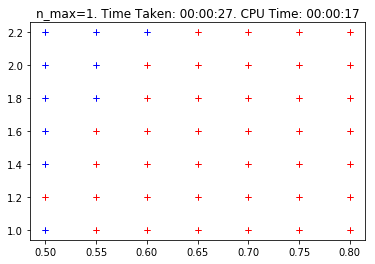

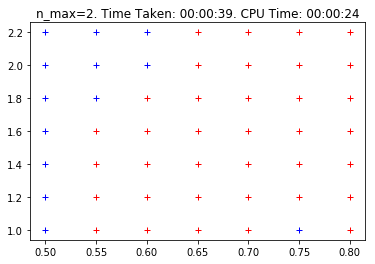

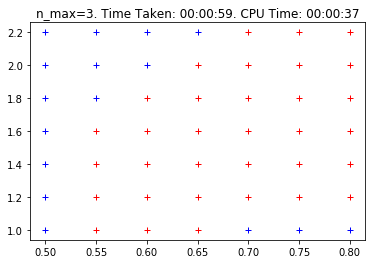

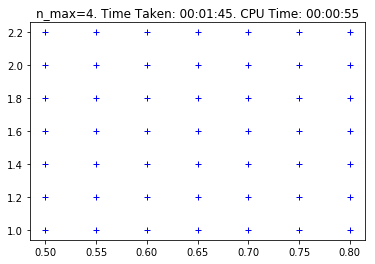

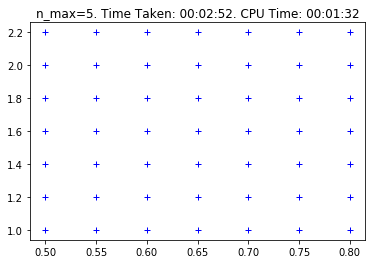

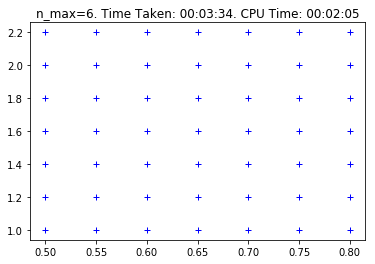

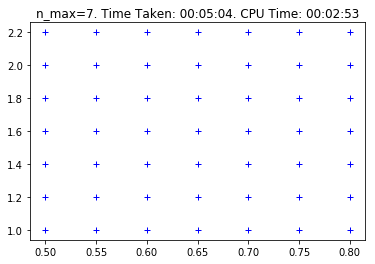

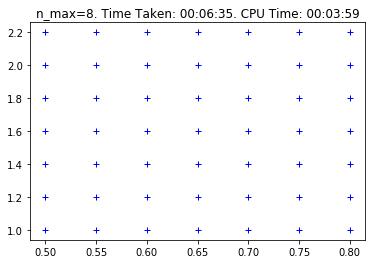

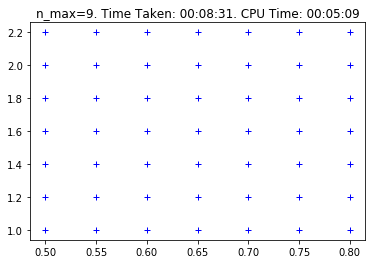

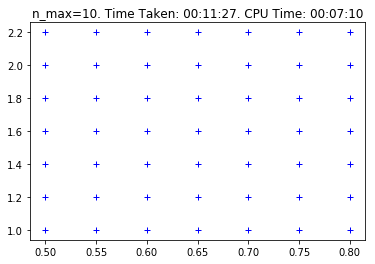

Run time 00:43:20 CPU time 00:26:25


In [10]:
iterate_n_max(n_set)